# Use machine learning approach to identify the quality of the wine

* 1 - fixed acidity
* 2 - volatile acidity
* 3 - citric acid
* 4 - residual sugar
* 5 - chlorides
* 6 - free sulfur dioxide
* 7 - total sulfur dioxide
* 8 - density
* 9 - pH
* 10 - sulphates
* 11 - alcohol Output variable
* 12 - quality (score between 0 and 10) - **1(good) if quality is more than 5** else **0(not good) if quality is less than 7**

## Source of original dataset: 
https://archive.ics.uci.edu/ml/datasets/wine+quality

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading CSV

In [3]:
df = pd.read_csv("wine_data.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Checking info of the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Checking for null values in the data

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Checking for blank values

In [6]:
np.where(df == " ")

C:\Users\aditi\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


(array([], dtype=int64), array([], dtype=int64))

# Checking value counts of the target variable

In [7]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Checking range of all variables

In [8]:
def range_finder(col):
    """
    Function to find the range of the numerical columns
    """
    print("Range: {} - {}".format(col.min(), col.max()))

In [9]:
for col in df.columns:
    print(col)
    range_finder(df[col])
    print("*"*5)

fixed acidity
Range: 4.6 - 15.9
*****
volatile acidity
Range: 0.12 - 1.58
*****
citric acid
Range: 0.0 - 1.0
*****
residual sugar
Range: 0.9 - 15.5
*****
chlorides
Range: 0.012 - 0.611
*****
free sulfur dioxide
Range: 1.0 - 72.0
*****
total sulfur dioxide
Range: 6.0 - 289.0
*****
density
Range: 0.99007 - 1.00369
*****
pH
Range: 2.74 - 4.01
*****
sulphates
Range: 0.33 - 2.0
*****
alcohol
Range: 8.4 - 14.9
*****
quality
Range: 3 - 8
*****


# Checking for duplicate values and removing them

In [10]:
df.duplicated().sum()

240

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.shape

(1359, 12)

In [13]:
1599-240

1359

In [14]:
## Checking value count after duplicates removal

df.quality.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

# Checking for total unique values in each column

In [15]:
for col in df.columns:
    a = df[col].nunique()
    print(col, ": total unique-", a, '\n')

fixed acidity : total unique- 96 

volatile acidity : total unique- 143 

citric acid : total unique- 80 

residual sugar : total unique- 91 

chlorides : total unique- 153 

free sulfur dioxide : total unique- 60 

total sulfur dioxide : total unique- 144 

density : total unique- 436 

pH : total unique- 89 

sulphates : total unique- 96 

alcohol : total unique- 65 

quality : total unique- 6 



# Visualization

## 1. Box plots

Feature:  fixed acidity


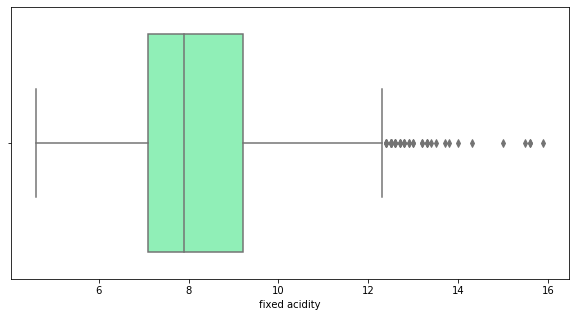

Feature:  volatile acidity


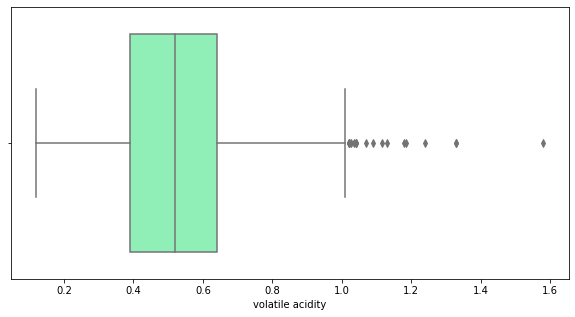

Feature:  citric acid


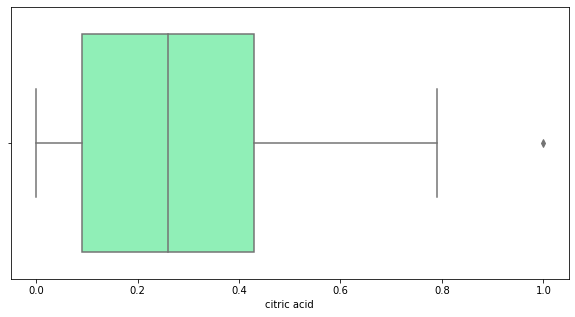

Feature:  residual sugar


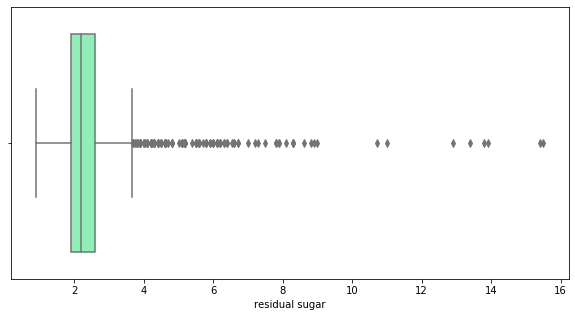

Feature:  chlorides


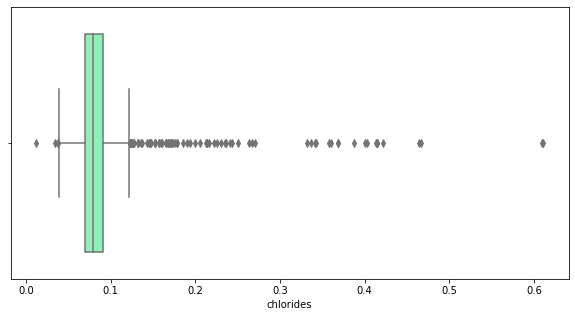

Feature:  free sulfur dioxide


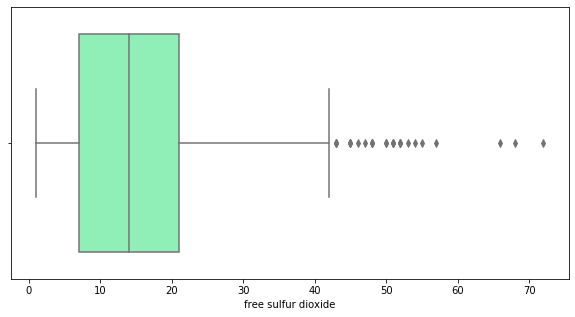

Feature:  total sulfur dioxide


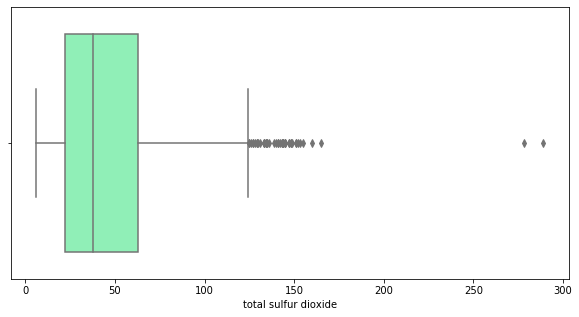

Feature:  density


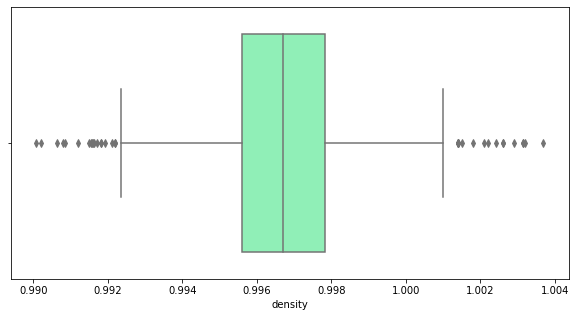

Feature:  pH


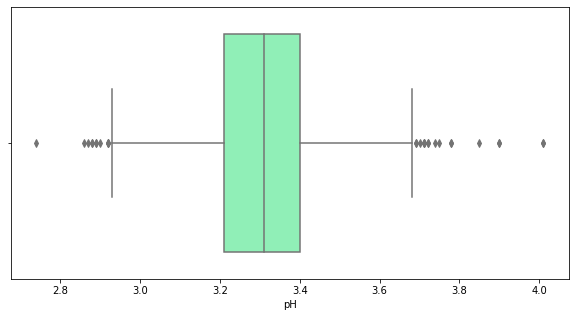

Feature:  sulphates


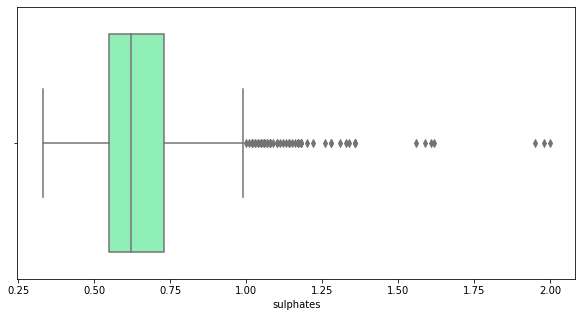

Feature:  alcohol


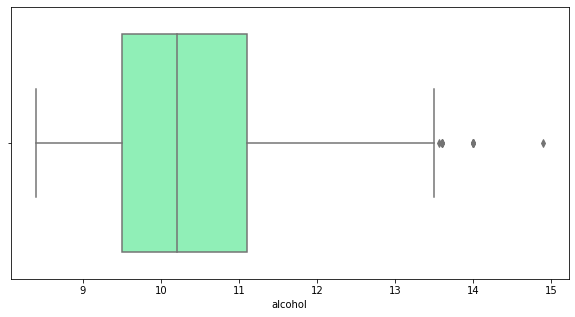

Feature:  quality


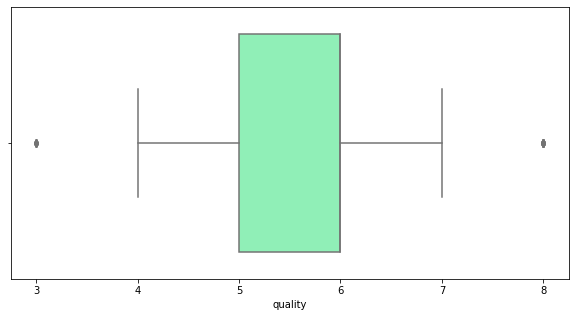

In [16]:
for col in df.columns:
    fig = plt.figure(figsize =(10,5))
    sns.boxplot(x = df[col], data= df, palette='rainbow', orient='h', )
    print('Feature: ', col)
    plt.show()

## 2. Quantile plots 

feature:  fixed acidity 




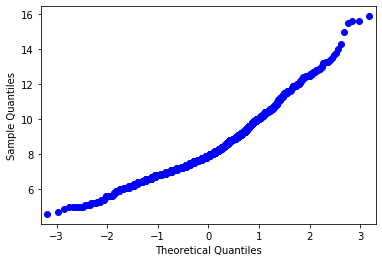

feature:  volatile acidity 




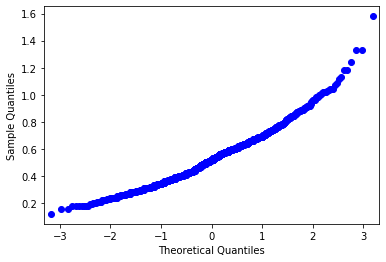

feature:  citric acid 




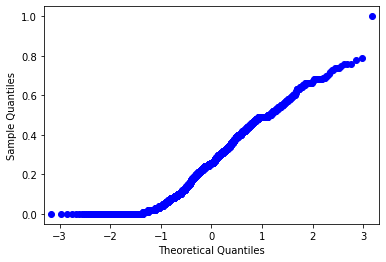

feature:  residual sugar 




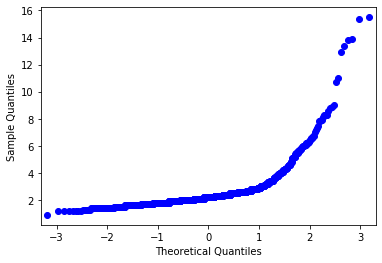

feature:  chlorides 




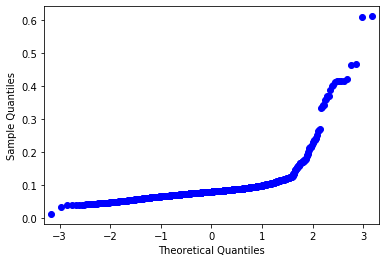

feature:  free sulfur dioxide 




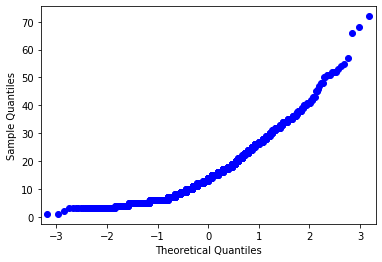

feature:  total sulfur dioxide 




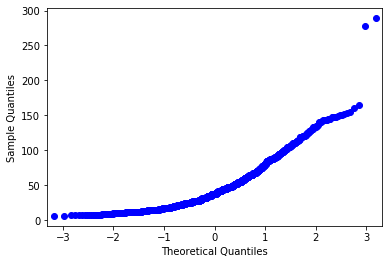

feature:  density 




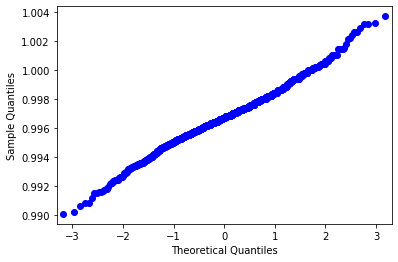

feature:  pH 




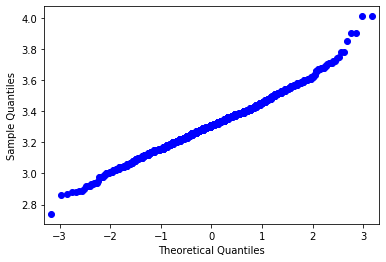

feature:  sulphates 




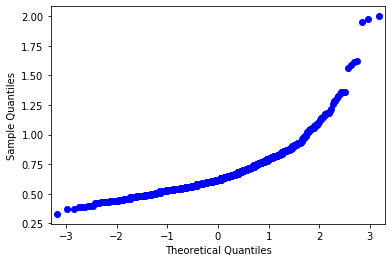

feature:  alcohol 




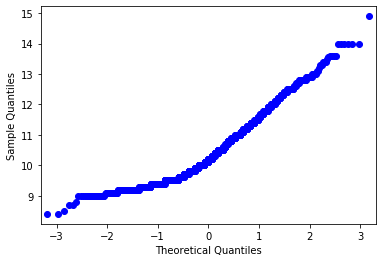

feature:  quality 




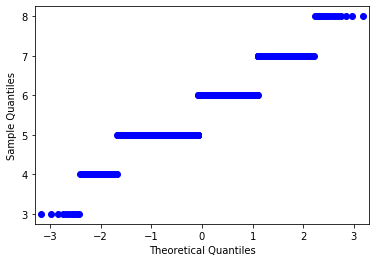

In [17]:
import statsmodels.api as sm
import pylab as py


for col in df.columns:
    sm.qqplot(df[col])
    print("feature: ", col, "\n"*2)
    py.show()

## 3. Distribution plots

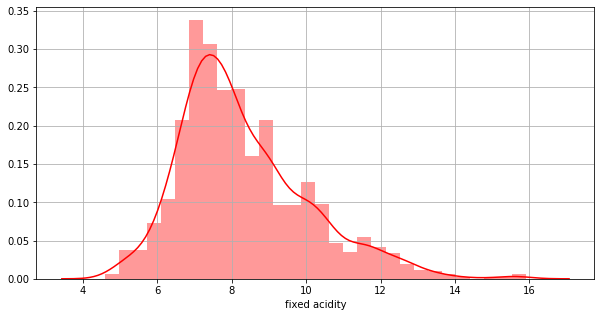

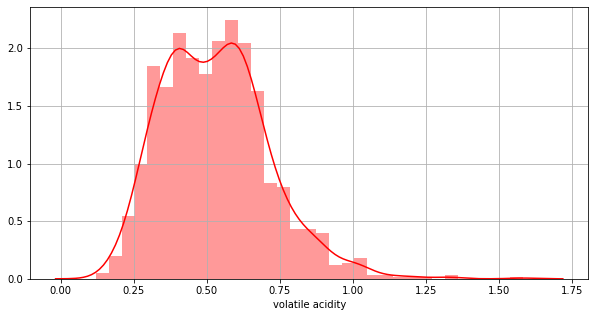

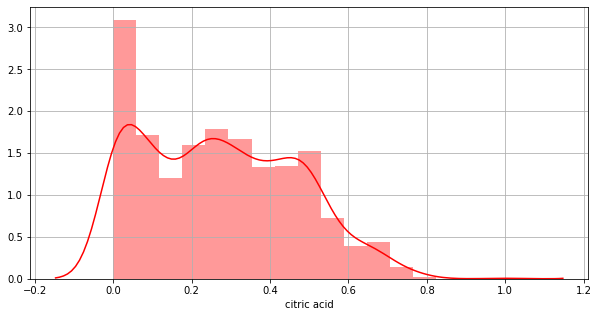

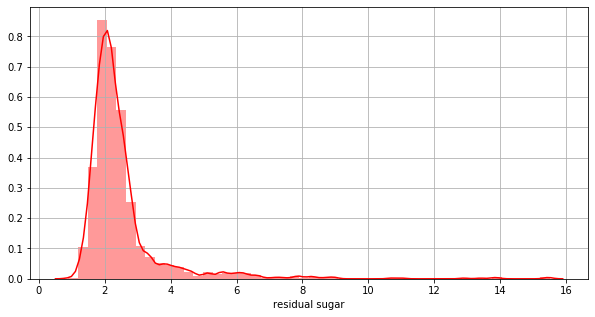

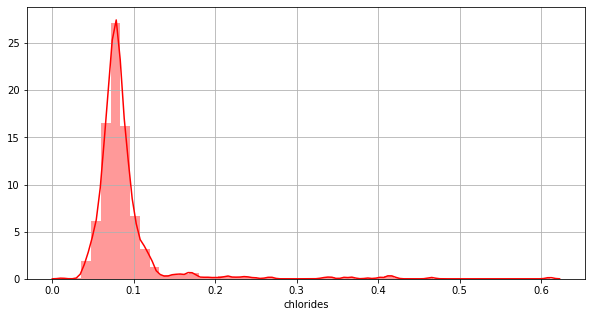

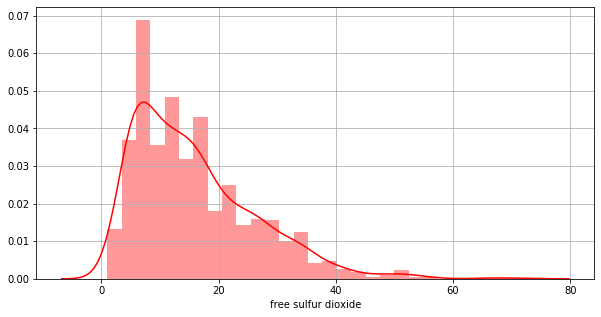

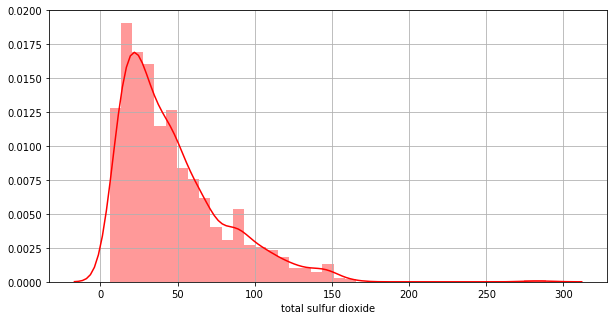

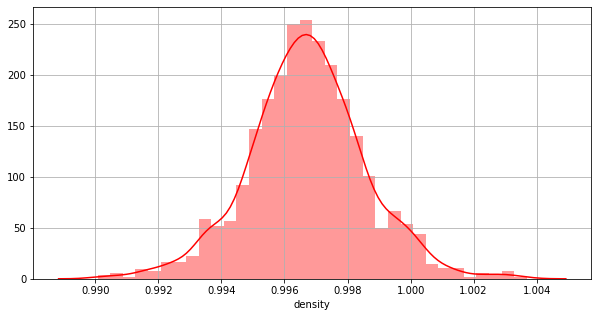

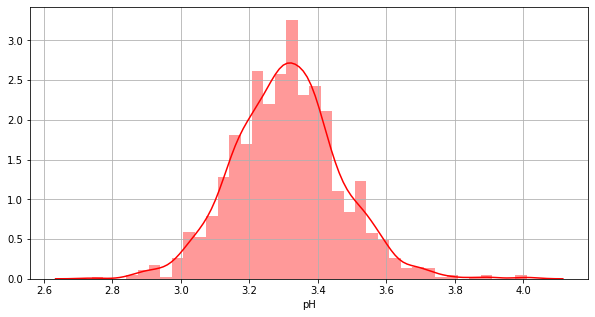

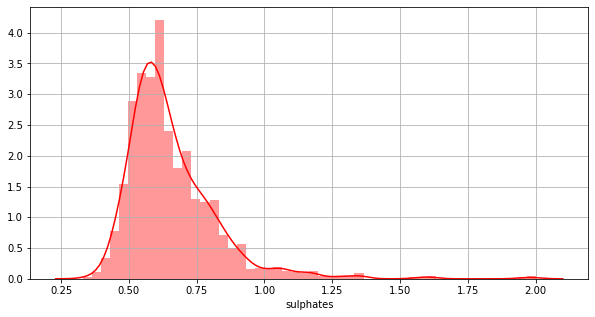

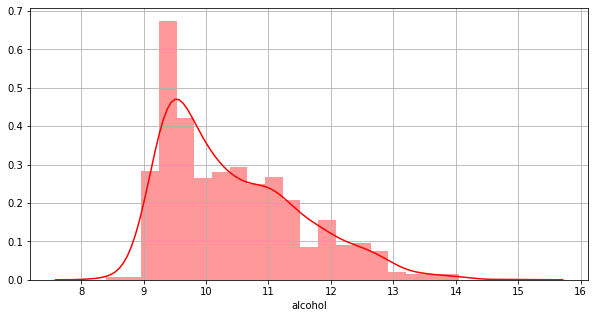

In [18]:
for col in df.iloc[:,:-1].columns:
    fig = plt.figure(figsize =(10,5))
    sns.distplot(df[col], color ='red')
    plt.grid()

# Checking the correlation between values

In [19]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


## 4. Analysing variation in target wrt all other variables using bar graphs

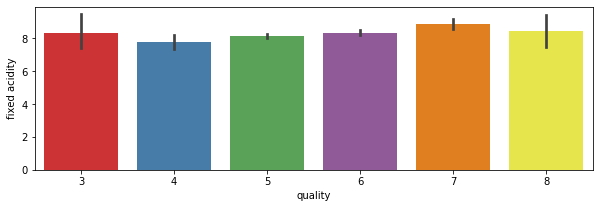

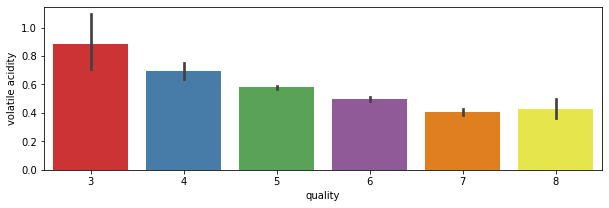

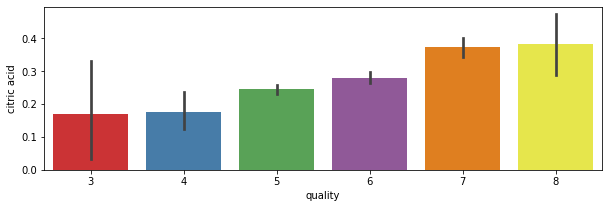

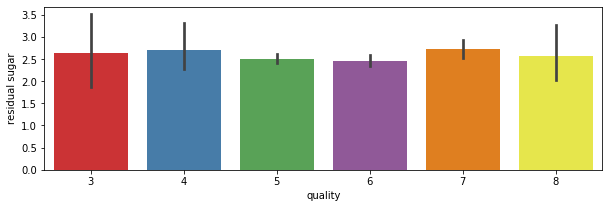

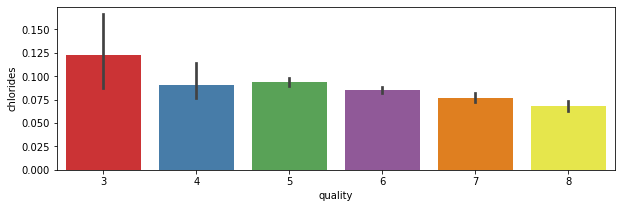

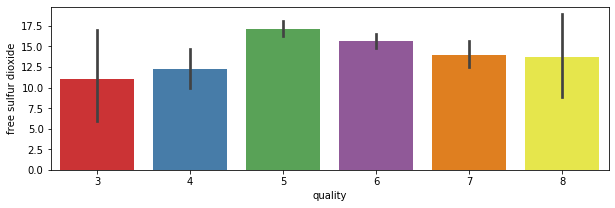

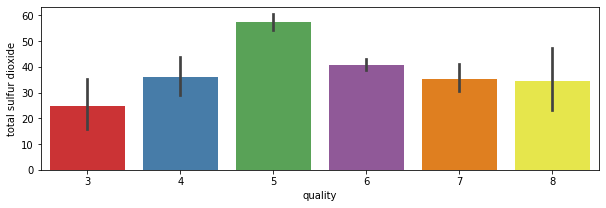

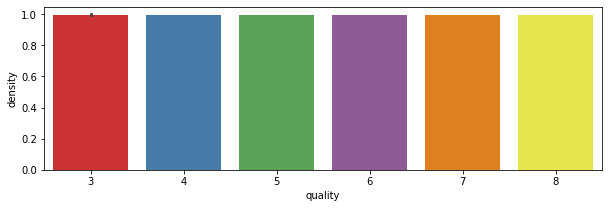

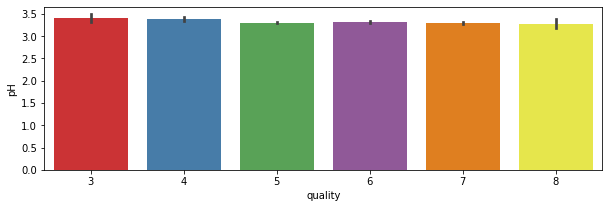

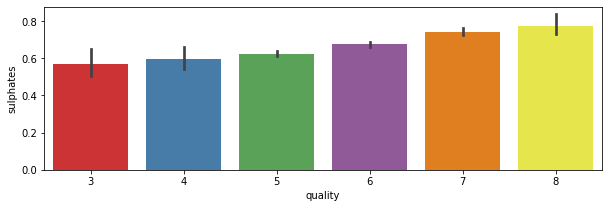

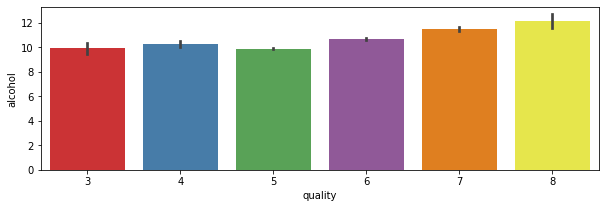

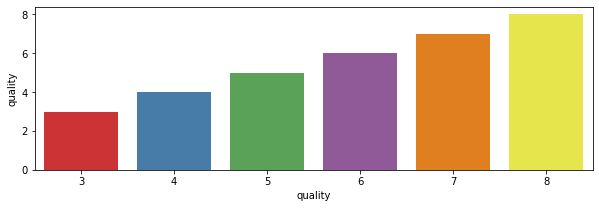

In [20]:
for col in df.columns:

    fig = plt.figure(figsize =(10,3))
    sns.barplot(x= 'quality', y = df[col],data=df, palette = 'Set1')
    plt.show()

## 5. Creating a count plot for quality

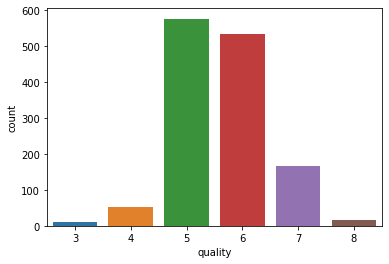

In [21]:
sns.countplot(x='quality',data=df)

## 6. Pie Chart for checking distribution in quality

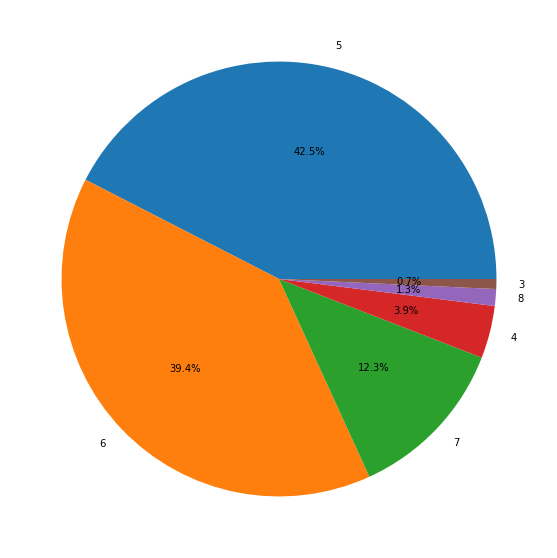

In [22]:
fig = plt.figure(figsize = (10,10))

plt.pie(df.quality.value_counts(),
        labels = df.quality.unique(),    
        autopct = '%0.1f%%' );         

### We have a large number of categories in quality column, so reducing them to 3 categories

In [23]:
df['grade'] = df['quality'].apply(lambda x: 'poor' if x<=5 else "average" if x ==6 else "good")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,poor
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,poor
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,poor
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,average
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,poor


### Checking count of new categories

In [24]:
df.grade.value_counts()

poor       640
average    535
good       184
Name: grade, dtype: int64

## 7. Checking distribution of new target categories using pie chart

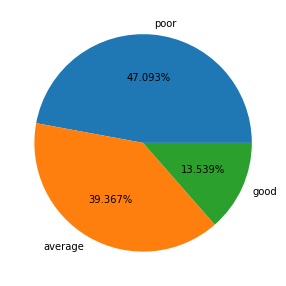

In [25]:
fig = plt.figure(figsize = (5,5))

plt.pie(df.grade.value_counts(),
        labels = df.grade.unique(),    
        autopct = '%0.3f%%' );         

## 8. Analysing variation in new target wrt all other variables using bar graphs

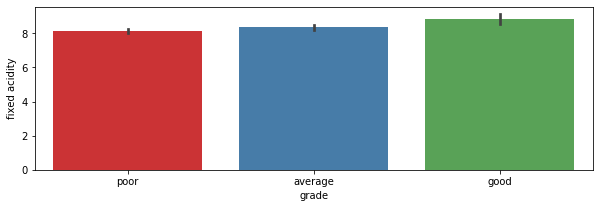

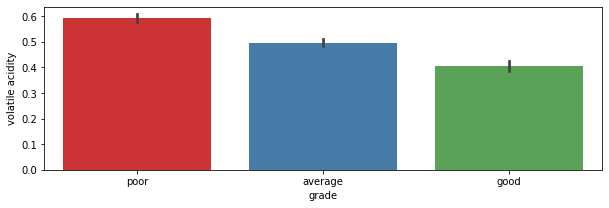

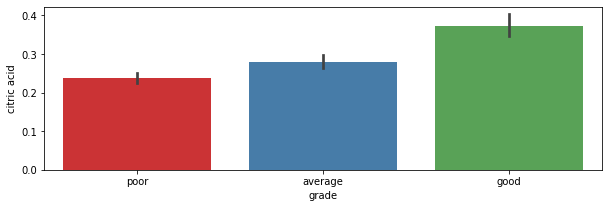

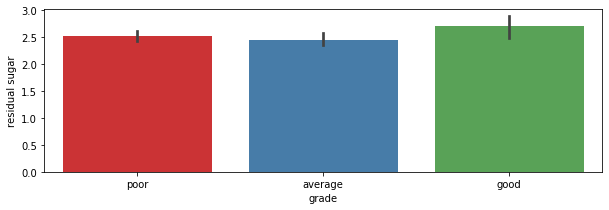

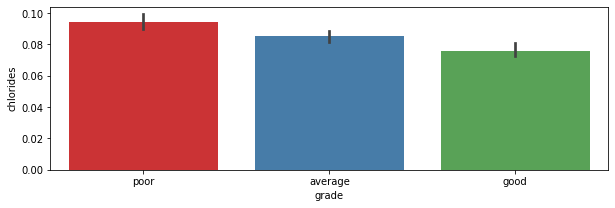

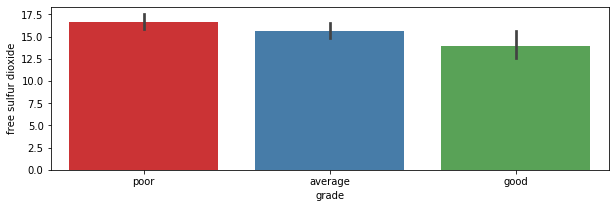

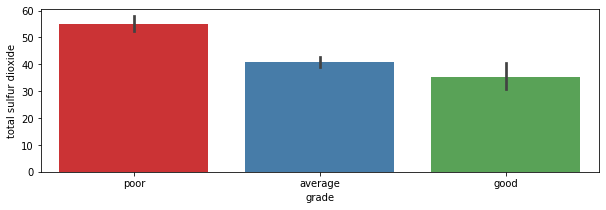

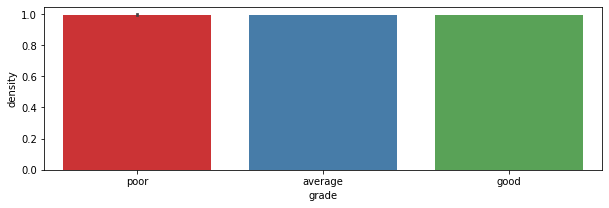

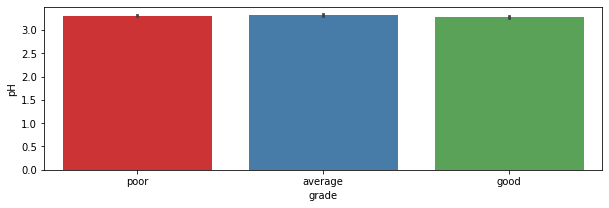

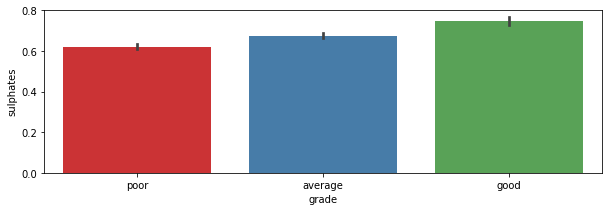

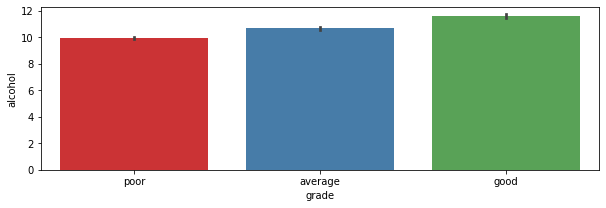

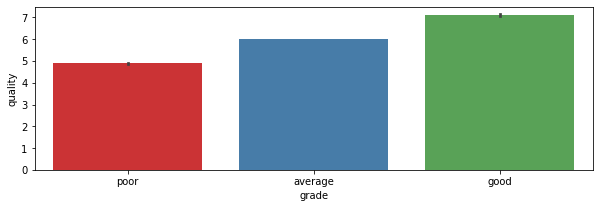

ValueError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 720x216 with 0 Axes>

In [26]:
for col in df.columns:

    fig = plt.figure(figsize =(10,3))
    sns.barplot(x= 'grade', y = df[col],data=df, palette = 'Set1')
    plt.show()

## 9. Creating a pairplot

In [ ]:
sns.pairplot(df, hue = 'grade', palette = 'gist_ncar', diag_kind = 'bar' )

## 10. Checking Sum of values after grouping by grade

In [ ]:
for col in df.iloc[:, :-1].columns:
    df.groupby('grade')[[col]].sum().plot(kind = 'bar', color = 'red')
    plt.show()

## 11. Creating a plot for mean and median after grouping by grade

In [ ]:
for col in df.iloc[:, :-1].columns:
    df.groupby('grade')[[col]].agg(['median', 'mean']).plot(kind = 'bar')
    plt.show()

## 12.Creating a Countplot for grade

In [ ]:
sns.countplot(x='grade',data=df)

## 13.Correlation Matrix

In [ ]:
plt.figure(figsize=(20,16))
annot_kws={'fontsize': 15,'fontstyle':'italic','color':'k', 'alpha': 0.8,
'backgroundcolor':'w', 'verticalalignment':'center', 'rotation':'horizontal'}

cbar_kws={'orientation':'horizontal',
'shrink':1,
'extend':'min',
'extendfrac':0.08,
'ticks':np.arange(0,22),
'drawedges':True}

sns.heatmap(df.corr(), cmap='coolwarm', annot=True, annot_kws=annot_kws, cbar_kws=cbar_kws, linewidth=3, linecolor='k')
plt.title('heatmap to check correlation', fontsize=2)

sns.set(font_scale= 1.4)

## Checking spread of data

In [ ]:
df.describe()

## Violin plot for grade v/s citric acid

In [ ]:
sns.violinplot(x = 'grade', y = 'citric acid', data = df)

## Boxplot for grade v/s citric acid

In [ ]:
sns.boxplot(x = 'grade', y = 'citric acid', data = df)

## Swarmplot for grade v/s pH

In [ ]:
sns.swarmplot(x = 'grade', y = 'pH', data = df)

# Outlier Treatment

In [ ]:
for col in df.columns:
    if df[col].dtype == int or df[col].dtype == float:
        q1, q3 = np.percentile(df[col], [25,75])
        iqr = q3-q1
        lower_fence = q1-(1.5 * iqr)
        upper_fence = q3+(1.5 * iqr)
    
        print("feature: ", col, '\nq1:', q1,'\nq3: ', q3, '\niqr: ', iqr, '\nlower_fence: ', lower_fence, '\nupper_fence: ', upper_fence, '\n'*2)

## Outlier Treatment

In [ ]:
for col in df.columns:
    if df[col].dtype == int or df[col].dtype == float:
        q1, q3 = np.percentile(df[col], [25,75])
        iqr = q3-q1
        lower_fence = q1-(1.5 * iqr)
        upper_fence = q3+(1.5 * iqr)
    
        print("feature: ", col, '\nq1:', q1,'\nq3: ', q3, '\niqr: ', iqr, '\nlower_fence: ', lower_fence, '\nupper_fence: ', upper_fence, '\n')
        
        df[col] = df[col].apply(lambda x: upper_fence if x > upper_fence else lower_fence if x< lower_fence else x)
        range_finder(df[col])
        sns.boxplot(x = df[col], data= df, palette='rainbow', orient='h')
        plt.show()
        print('*'*100, '\n'*2)

# Machine Learning

In [32]:
from sklearn.model_selection import train_test_split

In [35]:
X = df.drop(['grade','quality'],1)
y = df['grade']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state= 41)

In [37]:
display(X_train.head(),
       X_test.head(),
       y_train.head(),
       y_test.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1082,7.2,0.38,0.30,1.8,0.073,31.0,70.0,0.99685,3.42,0.59,9.5
56,10.2,0.42,0.57,3.4,0.070,4.0,10.0,0.99710,3.04,0.63,9.6
929,8.7,0.33,0.38,3.3,0.063,10.0,19.0,0.99468,3.30,0.73,12.0
379,8.3,0.42,0.38,2.5,0.094,24.0,60.0,0.99790,3.31,0.70,10.8
1236,7.8,0.55,0.00,1.7,0.070,7.0,17.0,0.99659,3.26,0.64,9.4


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1436,10.0,0.38,0.38,1.6,0.169,27.0,90.0,0.99914,3.15,0.65,8.5
1305,7.5,0.61,0.26,1.9,0.073,24.0,88.0,0.99612,3.30,0.53,9.8
1219,9.0,0.39,0.40,1.3,0.044,25.0,50.0,0.99478,3.20,0.83,10.9
358,11.9,0.43,0.66,3.1,0.109,10.0,23.0,1.00000,3.15,0.85,10.4
1128,10.0,0.43,0.33,2.7,0.095,28.0,89.0,0.99840,3.22,0.68,10.0


1082    average
56         poor
929        good
379     average
1236    average
Name: grade, dtype: object

1436       poor
1305       poor
1219    average
358        good
1128       poor
Name: grade, dtype: object

In [38]:
print('X_train: ', len(X_train), '\t', 'y_train', len(y_train))
print('X_test: ', len(X_test), '\t', 'y_test', len(y_test))

X_train:  951 	 y_train 951
X_test:  408 	 y_test 408


In [39]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

## Applying Random Forest Algorithm

In [40]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, mean_absolute_error, mean_squared_error, r2_score

In [41]:
rf = RandomForestClassifier(n_estimators=650, max_depth=22, random_state = 42) 
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=22, n_estimators=650, random_state=42)

### Predictions on Test data

In [44]:
y_predict = rf.predict(X_test)
y_predict[:15]

array(['poor', 'poor', 'good', 'average', 'poor', 'average', 'average',
       'poor', 'poor', 'poor', 'average', 'poor', 'good', 'poor', 'poor'],
      dtype=object)

In [49]:
print("Accuracy Score Testing Data", accuracy_score(y_predict,y_test)*100,'\n')
print("Classification Report" ,'\n', classification_report(y_test, y_predict))

Accuracy Score Testing Data 62.5 

Classification Report 
               precision    recall  f1-score   support

     average       0.57      0.55      0.56       172
        good       0.50      0.34      0.41        47
        poor       0.69      0.76      0.72       189

    accuracy                           0.62       408
   macro avg       0.59      0.55      0.56       408
weighted avg       0.62      0.62      0.62       408



In [55]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[ 95,  14,  63],
       [ 28,  16,   3],
       [ 43,   2, 144]], dtype=int64)

### Predictions on train data

In [50]:
y_train_pred = rf.predict(X_train)

y_train_pred[:15]

array(['average', 'poor', 'good', 'average', 'average', 'average',
       'average', 'poor', 'poor', 'average', 'poor', 'poor', 'poor',
       'poor', 'poor'], dtype=object)

In [52]:
print("Accuracy Score Training Data", accuracy_score(y_train, y_train_pred)*100,'\n')
print("Classification Report" ,'\n', classification_report(y_train, y_train_pred))

Accuracy Score Training Data 100.0 

Classification Report 
               precision    recall  f1-score   support

     average       1.00      1.00      1.00       363
        good       1.00      1.00      1.00       137
        poor       1.00      1.00      1.00       451

    accuracy                           1.00       951
   macro avg       1.00      1.00      1.00       951
weighted avg       1.00      1.00      1.00       951



In [57]:
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[363,   0,   0],
       [  0, 137,   0],
       [  0,   0, 451]], dtype=int64)

In [58]:
## Clear case of over-fitting

## Using Grid search CV

In [62]:
## Importing Grid Search

from sklearn.model_selection import GridSearchCV

In [63]:
clf = RandomForestClassifier() # defining Classifier

param_dist = {
             "n_estimators": [500,850],
             'max_depth': [2,5,10],
             } #list of estimators i.e number of Tress to be Considered for Training

rf_gs = GridSearchCV(clf, param_grid=param_dist, cv = 6) # CV = 5 data will be split into train & test folds 5 times

In [64]:
# Fitting Gridsearch to Trainig Data:

rf_gs.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 10], 'n_estimators': [500, 850]})

In [142]:
print(rf_gs.best_score_)

print(rf_gs.best_params_)

0.7571384974657006
{'max_depth': 10, 'n_estimators': 500}


In [67]:
## predictions on test data:

y_predict = rf_gs.predict(X_test)
y_predict[:15]

array(['poor', 'poor', 'good', 'average', 'poor', 'average', 'average',
       'poor', 'poor', 'poor', 'average', 'poor', 'good', 'average',
       'poor'], dtype=object)

In [68]:
## Checking accuracy and other metrices:

print("Accuracy Score Testing Data", accuracy_score(y_predict,y_test)*100,'\n')
print("Classification Report" ,'\n', classification_report(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)
cm

Accuracy Score Testing Data 62.745098039215684 

Classification Report 
               precision    recall  f1-score   support

     average       0.57      0.56      0.57       172
        good       0.48      0.32      0.38        47
        poor       0.69      0.76      0.73       189

    accuracy                           0.63       408
   macro avg       0.58      0.55      0.56       408
weighted avg       0.62      0.63      0.62       408



array([[ 97,  14,  61],
       [ 29,  15,   3],
       [ 43,   2, 144]], dtype=int64)

In [69]:
## Making predictions on train data:

y_train_pred = rf_gs.predict(X_train)

y_train_pred[:15]

array(['average', 'poor', 'good', 'average', 'average', 'average',
       'average', 'poor', 'poor', 'average', 'poor', 'poor', 'poor',
       'poor', 'poor'], dtype=object)

In [70]:
print("Accuracy Score Training Data", accuracy_score(y_train, y_train_pred)*100,'\n')
print("Classification Report" ,'\n', classification_report(y_train, y_train_pred))
cm = confusion_matrix(y_train, y_train_pred)
cm

Accuracy Score Training Data 98.31756046267087 

Classification Report 
               precision    recall  f1-score   support

     average       0.99      0.98      0.98       363
        good       1.00      0.95      0.97       137
        poor       0.98      1.00      0.99       451

    accuracy                           0.98       951
   macro avg       0.99      0.97      0.98       951
weighted avg       0.98      0.98      0.98       951



array([[355,   0,   8],
       [  4, 130,   3],
       [  1,   0, 450]], dtype=int64)

In [71]:
## Again, clear case of over-fitting

# Making predictions on the original values, i.e. 8 values of quality as target

In [73]:
X1 =  df.drop(['grade','quality'],1)
y1= df['quality']

In [74]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=41)

In [75]:
display(X1_train.head(),
       X1_test.head(),
       y1_train.head(),
       y1_test.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1082,7.2,0.38,0.30,1.8,0.073,31.0,70.0,0.99685,3.42,0.59,9.5
56,10.2,0.42,0.57,3.4,0.070,4.0,10.0,0.99710,3.04,0.63,9.6
929,8.7,0.33,0.38,3.3,0.063,10.0,19.0,0.99468,3.30,0.73,12.0
379,8.3,0.42,0.38,2.5,0.094,24.0,60.0,0.99790,3.31,0.70,10.8
1236,7.8,0.55,0.00,1.7,0.070,7.0,17.0,0.99659,3.26,0.64,9.4


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1436,10.0,0.38,0.38,1.6,0.169,27.0,90.0,0.99914,3.15,0.65,8.5
1305,7.5,0.61,0.26,1.9,0.073,24.0,88.0,0.99612,3.30,0.53,9.8
1219,9.0,0.39,0.40,1.3,0.044,25.0,50.0,0.99478,3.20,0.83,10.9
358,11.9,0.43,0.66,3.1,0.109,10.0,23.0,1.00000,3.15,0.85,10.4
1128,10.0,0.43,0.33,2.7,0.095,28.0,89.0,0.99840,3.22,0.68,10.0


1082    6
56      5
929     7
379     6
1236    6
Name: quality, dtype: int64

1436    5
1305    5
1219    6
358     7
1128    5
Name: quality, dtype: int64

In [82]:
## Making predictions on test data

rf = RandomForestClassifier(n_estimators=650, max_depth=22, random_state = 42) 
rf.fit(X1_train,y1_train)

RandomForestClassifier(max_depth=22, n_estimators=650, random_state=42)

In [83]:
y1_pred = rf.predict(X1_test)

y1_pred[:15]

array([5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 7, 5, 5], dtype=int64)

In [84]:
## checking reports

print('MAE: ',mean_absolute_error(y1_test, y1_pred))

print('MSE: ', mean_squared_error(y1_test, y1_pred))

print('RMSE: ',np.sqrt(mean_squared_error(y1_test, y1_pred)))

print('R2: ',r2_score(y1_test, y1_pred)*100)

MAE:  0.4534313725490196
MSE:  0.5416666666666666
RMSE:  0.7359800721939872
R2:  16.050945925815586


In [85]:
## Checking on train data

y1_train_pred = rf.predict(X1_test)

y1_train_pred[:15]

array([5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 7, 5, 5], dtype=int64)

In [86]:
## checking reports

print('MAE: ',mean_absolute_error(y1_test, y1_pred))

print('MSE: ', mean_squared_error(y1_test, y1_pred))

print('RMSE: ',np.sqrt(mean_squared_error(y1_test, y1_pred)))

print('R2: ',r2_score(y1_test, y1_pred)*100)

MAE:  0.4534313725490196
MSE:  0.5416666666666666
RMSE:  0.7359800721939872
R2:  16.050945925815586


In [87]:
## Extremely low values of R2- clear case of underfitting

## Changing the target column to only 2 categories- good and bad

In [89]:
df['grade2'] = df['quality'].apply(lambda x: 'poor' if x<= 5 else 'good' )

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade,grade2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,poor,poor
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,poor,poor
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,poor,poor
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,average,good
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,poor,poor


In [104]:
X = df.drop(['grade','quality', 'grade2'],1)
y= df['grade2']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state= 41)

In [106]:
print('X_train: ', len(X_train), '\t', 'y_train', len(y_train))
print('X_test: ', len(X_test), '\t', 'y_test', len(y_test))

X_train:  951 	 y_train 951
X_test:  408 	 y_test 408


In [115]:
## Again, applying algorithms:

rf = RandomForestClassifier(n_estimators=650, max_depth=22, random_state = 42) 
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=22, n_estimators=650, random_state=42)

In [108]:
y_test_pred = rf.predict(X_test)

y_test_pred[:15]

array(['poor', 'poor', 'good', 'good', 'poor', 'good', 'good', 'poor',
       'poor', 'poor', 'good', 'poor', 'good', 'good', 'poor'],
      dtype=object)

In [109]:
## Creating Reports

print("Accuracy Score Testing Data", accuracy_score(y_predict,y_test)*100,'\n')
print("Classification Report" ,'\n', classification_report(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)
cm

Accuracy Score Testing Data 42.40196078431372 

Classification Report 
               precision    recall  f1-score   support

     average       0.00      0.00      0.00         0
        good       0.94      0.13      0.23       219
        poor       0.69      0.76      0.73       189

    accuracy                           0.42       408
   macro avg       0.54      0.30      0.32       408
weighted avg       0.82      0.42      0.46       408



C:\Users\aditi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[  0,   0,   0],
       [126,  29,  64],
       [ 43,   2, 144]], dtype=int64)

In [113]:
## Checking on train

y_train_pred = rf.predict(X_train)

y_train_pred[:15]

array(['good', 'poor', 'good', 'good', 'good', 'good', 'good', 'poor',
       'poor', 'good', 'poor', 'poor', 'poor', 'poor', 'poor'],
      dtype=object)

In [114]:
print("Accuracy Score Testing Data", accuracy_score(y_train,y_train_pred)*100,'\n')
print("Classification Report" ,'\n', classification_report(y_train, y_train_pred))

cm = confusion_matrix(y_test, y_predict)
cm

Accuracy Score Testing Data 100.0 

Classification Report 
               precision    recall  f1-score   support

        good       1.00      1.00      1.00       500
        poor       1.00      1.00      1.00       451

    accuracy                           1.00       951
   macro avg       1.00      1.00      1.00       951
weighted avg       1.00      1.00      1.00       951



array([[  0,   0,   0],
       [126,  29,  64],
       [ 43,   2, 144]], dtype=int64)

In [ ]:
## Extreme case of overfitting

# Uisng Grid Search to find best parameters

In [134]:
clf = RandomForestClassifier() # defining Classifier

param_dist = {
             "n_estimators": [500,850],
             'max_depth': [2,5,10],
             } #list of estimators i.e number of Tress to be Considered for Training

rf_gs = GridSearchCV(clf, param_grid=param_dist, cv = 6) 

rf_gs.fit(X_train, y_train) # Fitting Gridsearch to Trainig Data

GridSearchCV(cv=6, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 10], 'n_estimators': [500, 850]})

In [135]:
print(rf_gs.best_score_)
# evaluated on a particular fold out of the 6-fold split that you gave for CV

0.7571384974657006


In [136]:
print(rf_gs.best_params_)
 # Parameter that gave the best results.

{'max_depth': 10, 'n_estimators': 500}


In [137]:
rf_gs.classes_

array(['good', 'poor'], dtype=object)

In [138]:
y_test_pred = rf_gs.predict(X_test)

y_test_pred[:15]

array(['poor', 'poor', 'good', 'good', 'poor', 'good', 'good', 'poor',
       'poor', 'poor', 'good', 'poor', 'good', 'good', 'poor'],
      dtype=object)

In [139]:
print(metrics.classification_report(y_test_pred, y_test))
print("The RF model accuracy on Test data is %s" %metrics.accuracy_score(y_test_pred, y_test))

              precision    recall  f1-score   support

        good       0.96      0.96      0.96       208
        poor       0.96      0.96      0.96       200

    accuracy                           0.96       408
   macro avg       0.96      0.96      0.96       408
weighted avg       0.96      0.96      0.96       408

The RF model accuracy on Test data is 0.9607843137254902


In [140]:
y_train_pred = rf_gs.predict(X_train)
y_train_pred[:15]

array(['good', 'poor', 'good', 'good', 'good', 'good', 'good', 'poor',
       'poor', 'good', 'poor', 'poor', 'poor', 'poor', 'poor'],
      dtype=object)

In [141]:
print(metrics.classification_report(y_train_pred, y_train))
print("The RF model accuracy on Test data is %s" %metrics.accuracy_score(y_train_pred, y_train))

              precision    recall  f1-score   support

        good       0.99      1.00      0.99       496
        poor       1.00      0.99      0.99       455

    accuracy                           0.99       951
   macro avg       0.99      0.99      0.99       951
weighted avg       0.99      0.99      0.99       951

The RF model accuracy on Test data is 0.9915878023133544


In [143]:
## Much Much better accuracy of prediction using grid search and finding an optimal value of the params
## params were causing a problem
## large number of classes were causing a problem because of target class imbalance